In [4]:
from skimage import io,filters, morphology, measure, draw,exposure
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy import stats
import pandas as pd
from skimage.filters import threshold_otsu
import seaborn as sns
import warnings
import math
from skimage.io import imread_collection
from ome_types import from_tiff
import matplotlib
warnings.filterwarnings('ignore')

In [1]:
PATH = '<PAT/TO/DIR>/WAVE/Fig3F-H_FigS2J_FRAP/'

In [2]:
def f_x(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [3]:
def frap_fit(x,A,tau,bs):
    return (bs + A * (1 - np.exp(-(x-4)/tau)))

# Normalize by unbleached region

In [5]:
for i in range(1,34):
    try:
        fmlp = pd.read_csv(PATH + 'kenetics/fmlp/raw_data/DUP_240408_PMW7_fmlp_'+"{:03d}".format(i)+'.txt',sep = '\t',names = ['y'])
        fmlp_background = pd.read_csv(PATH + 'kenetics/fmlp/raw_data/DUP_240408_PMW7_fmlp_'+"{:03d}".format(i)+'_background.txt',sep = '\t',names = ['y'])
        normalized = fmlp/fmlp_background
        normalized = (normalized-normalized.min())/(normalized.iloc[:3].max()-normalized.min())
        normalized.to_csv(PATH + 'kenetics/fmlp/normalized/DUP_240408_PMW7_fmlp_'+"{:03d}".format(i)+'_normalized.txt',header = 0,sep = '\t')
    except:
        continue

In [6]:
for i in range(1,15):
    try:
        latb = pd.read_csv(PATH + 'kenetics/latb/raw_data/DUP_231111_frap_2_'+str(i)+'.txt',sep = '\t',names = ['y'])
        latb_background = pd.read_csv(PATH + 'kenetics/latb/raw_data/DUP_231111_frap_2_'+str(i)+'_background.txt',sep = '\t',names = ['y'])
        normalized = latb/latb_background
        normalized = (normalized-normalized.min())/(normalized.iloc[:3].max()-normalized.min())
        normalized.to_csv(PATH + 'kenetics/latb/normalized/DUP_231111_frap_2_'+str(i)+'_normalized.txt',header = 0,sep = '\t')
    except:
        continue

# Kenetics of photorecovery 

In [7]:
fmlp_result = pd.read_csv(PATH + 'kenetics/fmlp/normalized/ave_normalized.csv')

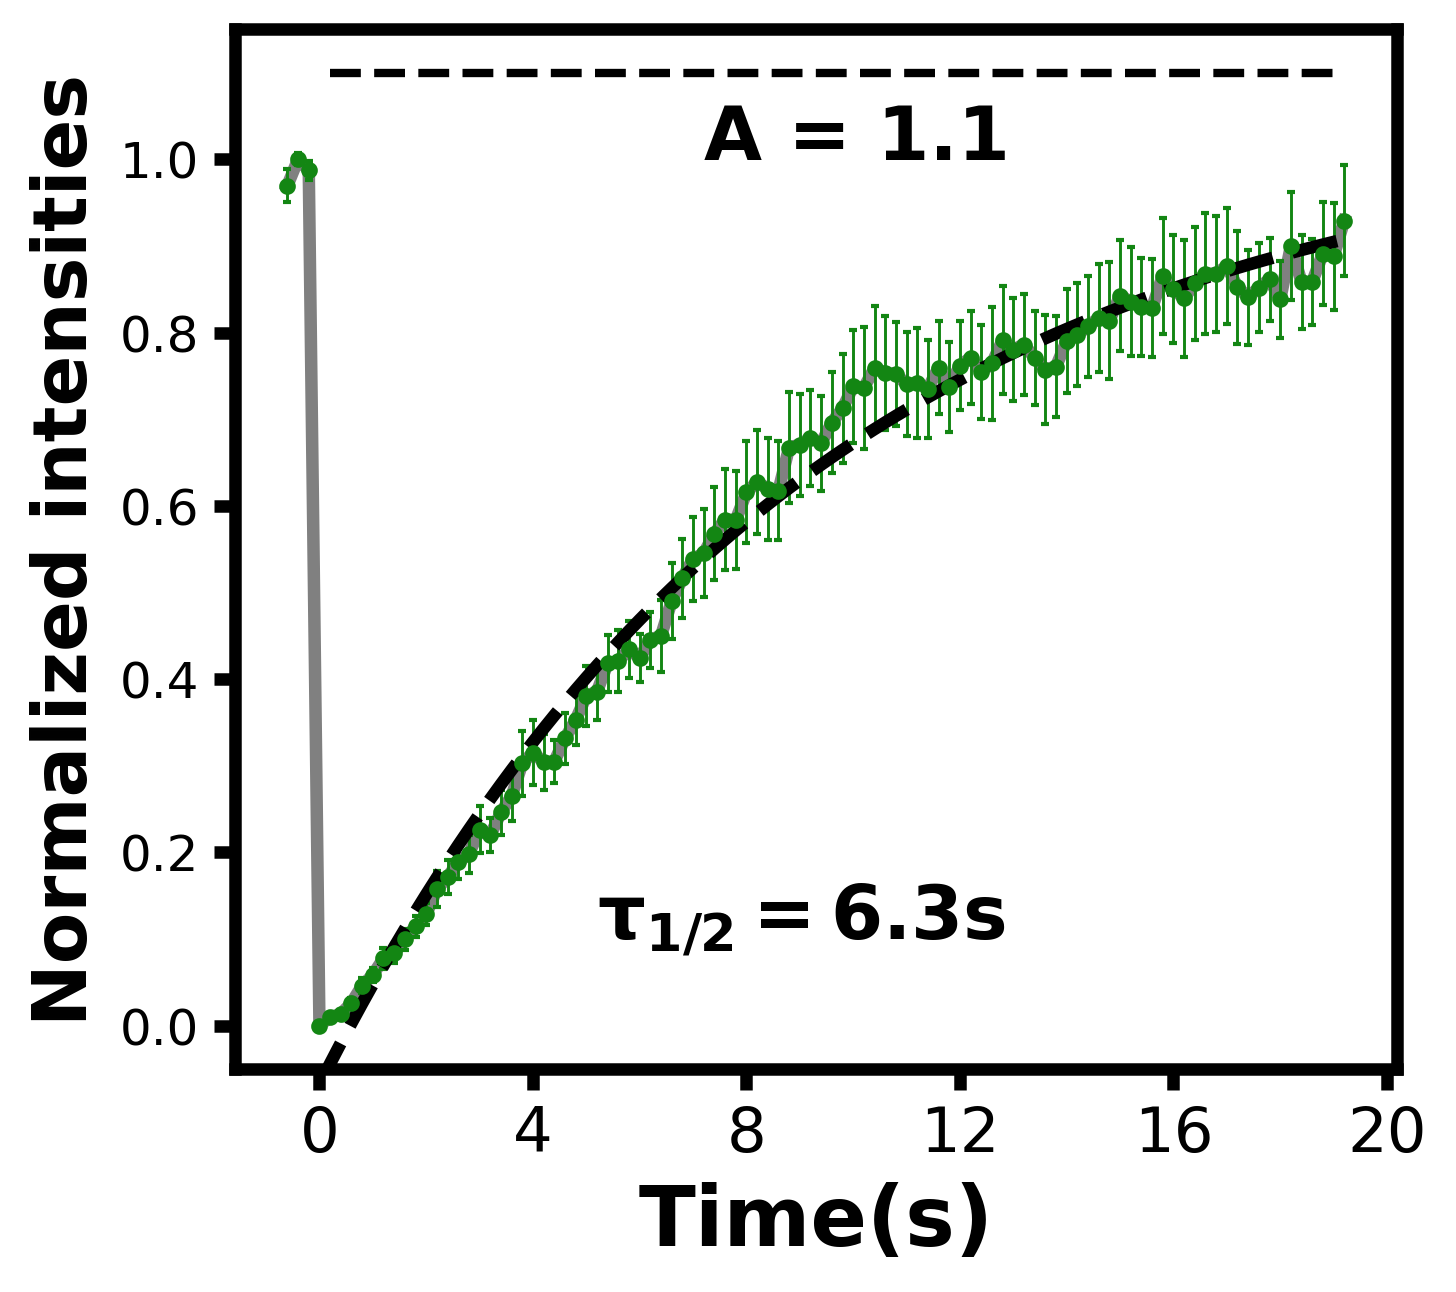

In [8]:
_,ax = plt.subplots(figsize = (5,4.5),dpi = 300)
plt.plot(fmlp_result.X1,fmlp_result.Y1,c = 'grey',lw = 3)
plt.errorbar(fmlp_result.X1,fmlp_result.Y1,fmlp_result.err1, linestyle='None',marker = 'o',ms = 3,elinewidth = 0.7,capsize=1,c = '#138613')
plt.plot(fmlp_result.iloc[3:].X1,frap_fit(fmlp_result.X1.iloc[3:],1.1096871,45.409203,-0.06800861),c = 'black',lw = 3,linestyle = '--')
plt.xticks(ticks = [4,24,44,64,84,104],labels=[0,4,8,12,16,20],fontsize = 15)
plt.xlabel('Time(s)',size = 20,fontweight = 'bold')
plt.text(40,1.0,'A = 1.1',size = 18,fontweight = 'bold')
plt.hlines(1.1,5,100,ls = '--',color = 'black',lw = 2)
plt.ylabel('Normalized intensities',size = 18,fontweight = 'bold')
plt.text(30,0.1,r'$\mathbf{\tau_{1/2} = 6.3s}$',size = 18,fontweight = 'bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
plt.ylim(-0.05,1.15)
# increase tick width
ax.tick_params(width=3,size = 5)
plt.yticks(size = 12)
plt.savefig(PATH + 'result_figures/FigS2J_fmlp_kenetics.png',bbox_inches = 'tight')

In [9]:
latb_result = pd.read_csv(PATH + 'kenetics/latb/normalized/ave_normalized.csv')

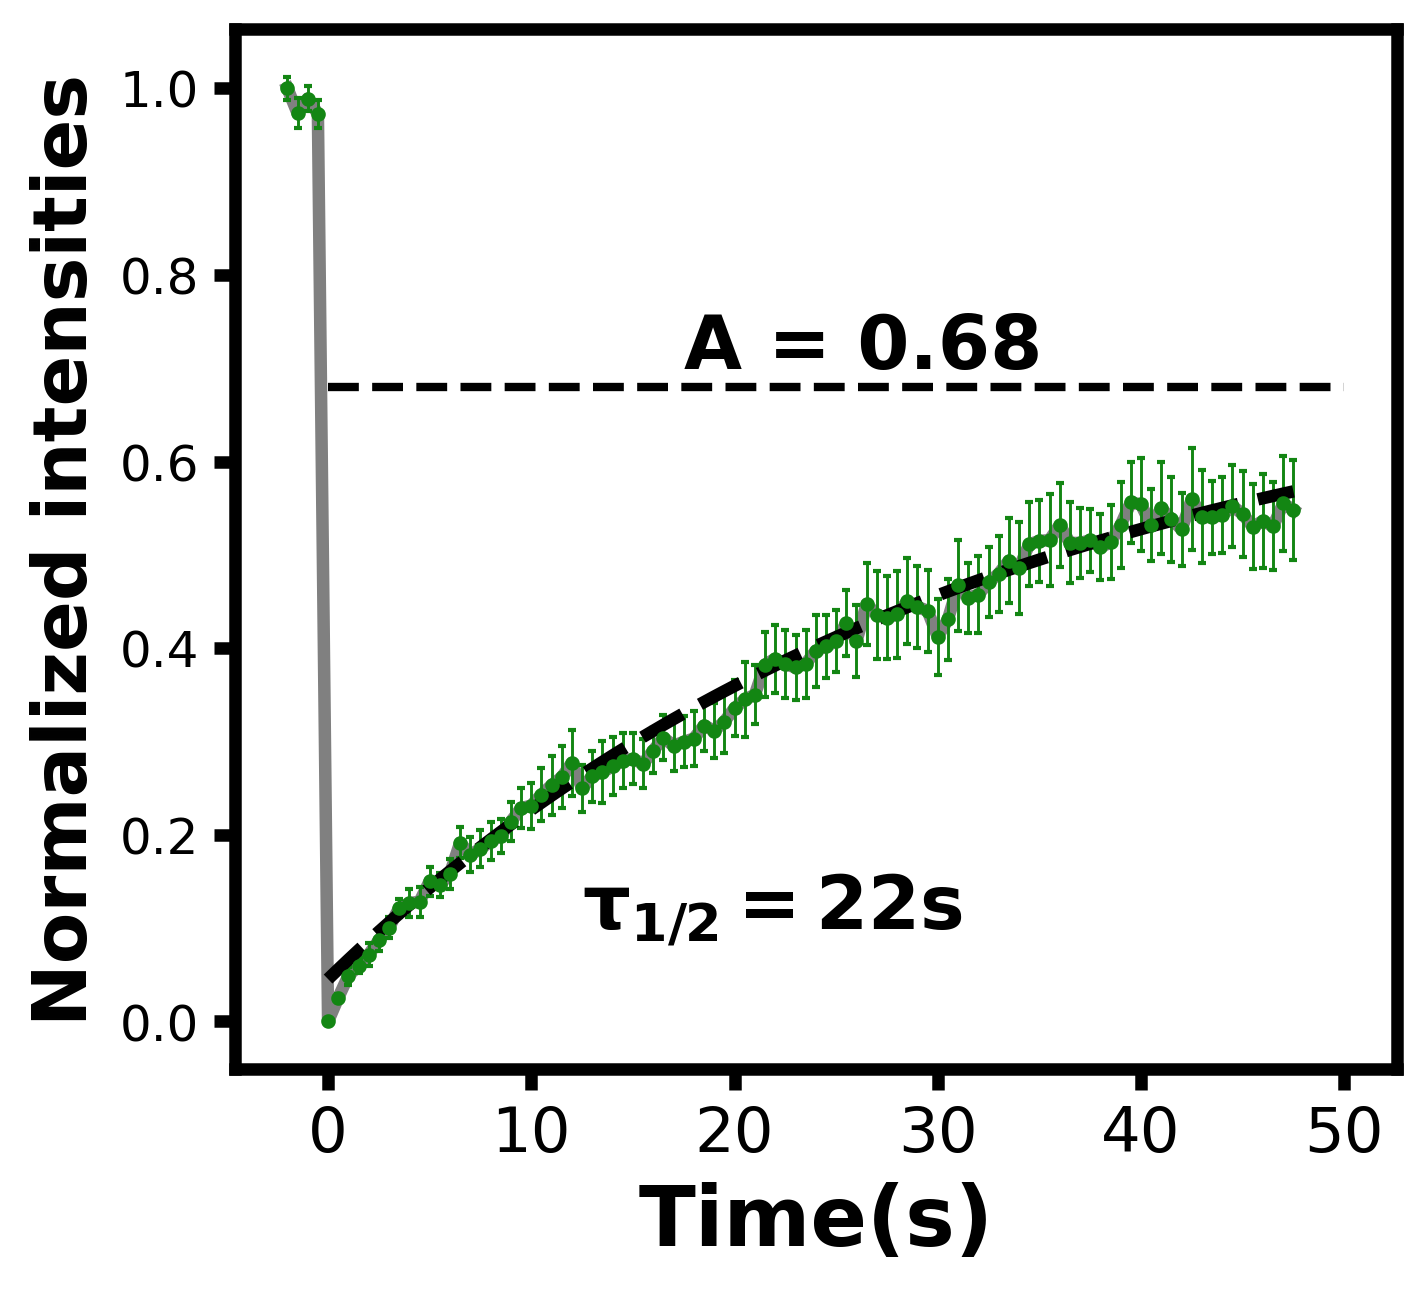

In [10]:
_,ax = plt.subplots(figsize = (5,4.5),dpi = 300)
# plt.scatter(latb_result.X1,latb_result.Y1)
plt.plot(latb_result.X1,latb_result.Y1,c = 'grey',lw = 3)
# plt.fill_between(latb_result.X1,latb_result.Y1-latb_result.err1,latb_result.Y1+latb_result.err1,alpha = 0.6)
plt.errorbar(latb_result.X1,latb_result.Y1,latb_result.err1, linestyle='None',marker = 'o',ms = 2.5,elinewidth = 0.7,capsize=1,c = '#138613')
plt.plot(latb_result.iloc[4:].X1,frap_fit(latb_result.iloc[4:].X1,0.6859078,63.895287,0.03480598),c = 'black',lw = 3,linestyle = '--')
plt.xticks(ticks = [5,25,45,65,85,105],labels=[0,10,20,30,40,50],fontsize = 15)
plt.xlabel('Time(s)',size = 20,fontweight = 'bold')
plt.ylabel('Normalized intensities',size = 18,fontweight = 'bold')
plt.text(30,0.1,r'$\mathbf{\tau_{1/2} = 22s}$',size = 18)
plt.text(40,0.7,'A = 0.68',size = 18,fontweight = 'bold')
plt.hlines(0.68,5,105,ls = '--',color = 'black',lw = 2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size =5)
plt.yticks(size = 12)
plt.savefig(PATH + 'result_figures/Fig3H_latb_kenetics.png',bbox_inches = 'tight')

# Quantification of recovery pattern

In [11]:
image = io.imread(PATH + "recovery_pattern/AVG_Stack.tif")

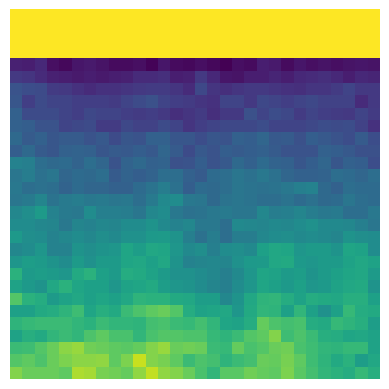

In [13]:
plt.imshow(image,cmap = 'viridis',vmax = 230)
plt.xticks([],[])
plt.yticks([],[])
plt.axis('off')
plt.savefig(PATH + 'result_figures/Fig3F_kymograph.png',bbox_inches= 'tight', dpi=300)

In [14]:
before = filters.gaussian(image[:4], sigma=1,preserve_range=True)

In [15]:
blur = filters.gaussian(image[4:], sigma=2,preserve_range=True)

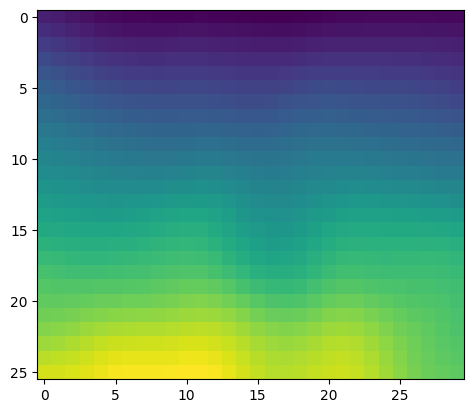

In [16]:
plt.imshow(blur[0:29],cmap = 'viridis')

In [17]:
cmap = matplotlib.cm.get_cmap('viridis')

In [18]:
blur = np.array(blur)

In [19]:
before = np.array(before)

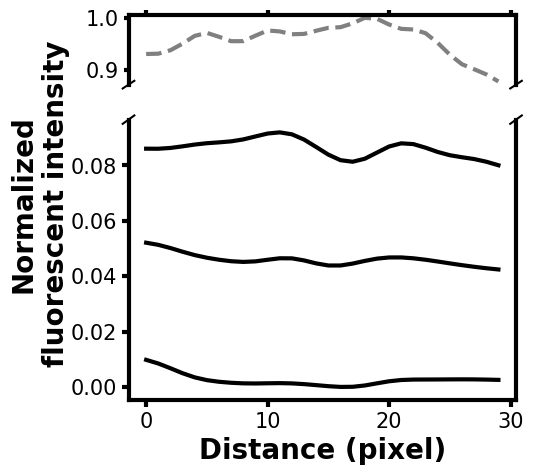

In [20]:
fig = plt.figure(figsize=(5,5))
spec = matplotlib.gridspec.GridSpec(ncols=1, nrows=2,height_ratios=[1, 4])
ax = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
large = np.max(before[0,:])
small = np.min(blur[0,:])
ax.plot((before[0,:]-small)/(large-small),color = 'grey',lw = 3,linestyle ='--')
ax2.plot((blur[0,:]-small)/(large-small),color = 'black',lw = 3)
ax2.plot((blur[10,:]-small)/(large-small),color = 'black',lw = 3)
ax2.plot((blur[20,:]-small)/(large-small),color = 'black',lw = 3)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax2.xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
n = 0.04
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d-n, +d+n), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d-n, +d+n), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonala
plt.ylabel('Normalized\nfluorescent intensity',size = 20,fontweight = 'bold')
ax2.yaxis.set_label_coords(-0.15, 0.7)
plt.xlabel('Distance (pixel)',size = 20,fontweight = 'bold')
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax2.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3, labeltop=False)
ax2.tick_params(width=3,size = 5)
plt.savefig(PATH + 'result_figures/Fig3G_linescan.png',bbox_inches = 'tight', dpi=300)